In [1]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

from numpy import array


from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rsquared
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [4]:
num_cols = [
    'id',
    'Количество.комнат',
    'Студия',
    'Общая.площадь',
    'Этаж',
    'Этажей.в.доме',
    'Парковка',
    'Без.ремонта', 'Дизайнерский', 'Евроремонт', 'Косметический',
    'Балкон', 'Лоджия',
    'Совмещенный.санузел', 'Раздельный.санузел',
    'Лифт', 'Грузовой.лифт',
    'Мусоропровод',
    'Год.постройки',
    'Аварийный',
    'Железобетонные.перекрытия', 'Смешанные.перекрытия', 'Деревянные.перекрытия', 'Иные.перекрытия',
    'Панельные.стены', 'Блочные.стены', 'Деревянные.стены', 'Кирпичные.стены', 'Монолитные.стены', 'Смешанные.стены',
    'Школа.1000',
    'ВУЗ.1000', 'ТЦ.1000',
    'Стоматология.1000',
    'Почта.1000',
    'Поликлиника.1000',
    'Парк.1000',
    'Остановка.1000',
    'Одежда..1000',
    'Супер3кет.1000',
    'Кинотеатр.1000',
    'Кафе.1000',
    'АЗС.1000',
    'Детский.сад.1000',
    'Бар.1000',
    'Банк.1000',
    'Аптека.1000'
]

cols_to_standartize = [
    'Количество.комнат',
    'Общая.площадь',
    'Этаж',
    'Этажей.в.доме',
    'Без.ремонта', 'Дизайнерский', 'Евроремонт', 'Косметический',
    'Год.постройки',
    'Школа.1000',
    'ВУЗ.1000', 'ТЦ.1000',
    'Стоматология.1000',
    'Почта.1000',
    'Поликлиника.1000',
    'Парк.1000',
    'Остановка.1000',
    'Одежда..1000',
    'Супер3кет.1000',
    'Кинотеатр.1000',
    'Кафе.1000',
    'АЗС.1000',
    'Детский.сад.1000',
    'Бар.1000',
    'Банк.1000',
    'Аптека.1000'          
]


target_col = 'Цена'

train['Балкон'] = train.apply(lambda x: x['Балкон'] + x['Лоджия'], axis=1)
test['Балкон'] = test.apply(lambda x: x['Балкон'] + x['Лоджия'], axis=1)
test.drop(['Лоджия', 'Совмещенный.санузел'], axis=1, inplace=True)
train.drop(['Лоджия', 'Совмещенный.санузел'], axis=1, inplace=True)


In [6]:
test

,id,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,Косметический,Балкон,Раздельный.санузел,Лифт,Грузовой.лифт,Мусоропровод,Год.постройки,Аварийный,Железобетонные.перекрытия,Смешанные.перекрытия,Деревянные.перекрытия,Иные.перекрытия,Панельные.стены,Блочные.стены,Деревянные.стены,Кирпичные.стены,Монолитные.стены,Смешанные.стены,Школа.1000,ВУЗ.1000,ТЦ.1000,Стоматология.1000,Почта.1000,Поликлиника.1000,Парк.1000,Остановка.1000,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000
0,747,1,0,39.0,4,16,0,0,0,0,1,1.0,1,1,1,1,2016,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,1,2,0,7,0,2,0,1,1,2,1,0,5
1,962,1,0,34.8,1,2,0,0,0,0,1,0.0,0,0,0,0,2004,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,2,0,2,0,0,3,3,1,1,1
2,1105,1,0,37.7,2,17,0,0,0,0,1,1.0,0,1,0,1,2015,0,1,0,0,0,0,0,0,1,0,0,2,2,3,9,1,0,1,5,2,9,0,9,3,17,4,2,13
3,795,4,0,83.5,10,10,0,0,0,0,1,1.0,1,1,0,1,1988,0,1,0,0,0,1,0,0,0,0,0,4,2,5,13,3,1,2,13,47,5,1,19,2,11,2,13,20
4,390,1,0,42.0,10,10,0,0,0,0,1,1.0,1,0,1,0,2013,0,1,0,0,0,1,0,0,0,0,0,4,3,0,12,2,2,2,20,8,8,0,7,2,18,6,6,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,1060,2,0,48.0,5,5,0,0,0,0,1,1.0,1,0,0,0,1967,0,1,0,0,0,1,0,0,0,0,0,4,0,1,8,1,1,0,9,4,3,0,5,1,11,0,9,12
779,67,4,0,84.0,10,10,0,0,0,1,0,1.0,0,1,0,1,1995,0,1,0,0,0,1,0,0,0,0,0,4,7,6,33,3,6,4,28,43,8,0,32,5,19,18,38,32
780,754,1,0,36.0,8,10,0,0,0,0,1,1.0,1,1,0,1,1988,0,1,0,0,0,1,0,0,0,0,0,5,3,2,5,1,4,0,11,2,10,0,6,3,14,1,2,15
781,1077,2,0,53.0,3,5,0,0,0,0,1,1.0,1,0,0,0,1990,0,1,0,0,0,0,0,0,1,0,0,2,1,0,1,1,2,0,4,6,4,1,2,6,4,1,1,6


In [7]:
train

,id,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,Косметический,Балкон,Раздельный.санузел,Лифт,Грузовой.лифт,Мусоропровод,Год.постройки,Аварийный,Железобетонные.перекрытия,Смешанные.перекрытия,Деревянные.перекрытия,Иные.перекрытия,Панельные.стены,Блочные.стены,Деревянные.стены,Кирпичные.стены,Монолитные.стены,Смешанные.стены,Школа.1000,ВУЗ.1000,ТЦ.1000,Стоматология.1000,Почта.1000,Поликлиника.1000,Парк.1000,Остановка.1000,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
0,1122,1,0,33.6,5,9,0,0,0,0,1,1.0,0,1,0,1,2013,0,1,0,0,0,1,0,0,0,0,0,2,2,2,8,0,1,1,4,1,8,0,6,1,12,5,2,12,2030000.0
1,1369,1,0,32.0,2,5,0,0,0,0,1,1.0,0,0,0,0,1975,0,1,0,0,0,1,0,0,0,0,0,2,0,3,3,2,1,2,11,5,2,0,6,2,5,1,5,14,1400000.0
2,901,2,0,48.3,2,14,0,0,0,1,0,0.0,0,1,0,1,1984,0,1,0,0,0,0,0,0,1,0,0,12,4,1,5,5,1,2,11,5,4,0,8,1,23,5,10,23,2950000.0
3,379,3,0,86.0,7,15,0,0,0,1,0,1.0,1,1,0,1,2013,0,1,0,0,0,1,0,0,0,0,0,1,2,2,7,0,1,1,4,1,8,0,6,0,11,5,1,12,5250000.0
4,162,1,1,18.0,1,5,0,0,0,0,1,0.0,0,0,0,0,1973,0,1,0,0,0,1,0,0,0,0,0,3,0,0,1,2,3,0,7,0,2,0,1,3,4,3,0,9,1080000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,318,2,0,45.0,1,5,0,0,0,0,1,0.0,0,0,0,0,1973,0,1,0,0,0,1,0,0,0,0,0,5,0,1,6,1,3,0,6,3,5,0,7,2,11,2,8,9,2100000.0
798,1373,2,0,49.0,2,5,0,0,0,0,1,1.0,1,0,0,0,1979,0,1,0,0,0,1,0,0,0,0,0,1,0,3,3,2,1,1,11,5,2,0,6,3,4,1,5,13,3000000.0
799,499,2,0,39.0,2,12,0,0,0,0,1,2.0,1,1,0,1,1983,0,1,0,0,0,1,0,0,0,0,0,9,0,3,6,3,4,1,13,5,11,0,5,1,22,4,8,18,2450000.0
800,1375,1,1,21.0,3,5,1,0,0,0,1,0.0,0,1,1,0,2016,0,1,0,0,0,0,0,0,0,1,0,2,0,2,3,2,2,0,9,5,1,0,2,3,5,0,4,9,1300000.0


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         783 non-null    int64  
 1   Количество.комнат          783 non-null    int64  
 2   Студия                     783 non-null    int64  
 3   Общая.площадь              783 non-null    float64
 4   Этаж                       783 non-null    int64  
 5   Этажей.в.доме              783 non-null    int64  
 6   Парковка                   783 non-null    int64  
 7   Без.ремонта                783 non-null    int64  
 8   Дизайнерский               783 non-null    int64  
 9   Евроремонт                 783 non-null    int64  
 10  Косметический              783 non-null    int64  
 11  Балкон                     783 non-null    float64
 12  Раздельный.санузел         783 non-null    int64  
 13  Лифт                       783 non-null    int64  

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         802 non-null    int64  
 1   Количество.комнат          802 non-null    int64  
 2   Студия                     802 non-null    int64  
 3   Общая.площадь              802 non-null    float64
 4   Этаж                       802 non-null    int64  
 5   Этажей.в.доме              802 non-null    int64  
 6   Парковка                   802 non-null    int64  
 7   Без.ремонта                802 non-null    int64  
 8   Дизайнерский               802 non-null    int64  
 9   Евроремонт                 802 non-null    int64  
 10  Косметический              802 non-null    int64  
 11  Балкон                     802 non-null    float64
 12  Раздельный.санузел         802 non-null    int64  
 13  Лифт                       802 non-null    int64  

In [10]:
def showHeatmap(dataframe):

    plt.figure(figsize=(18,14))
    sns.heatmap(dataframe.corr())
    plt.show()

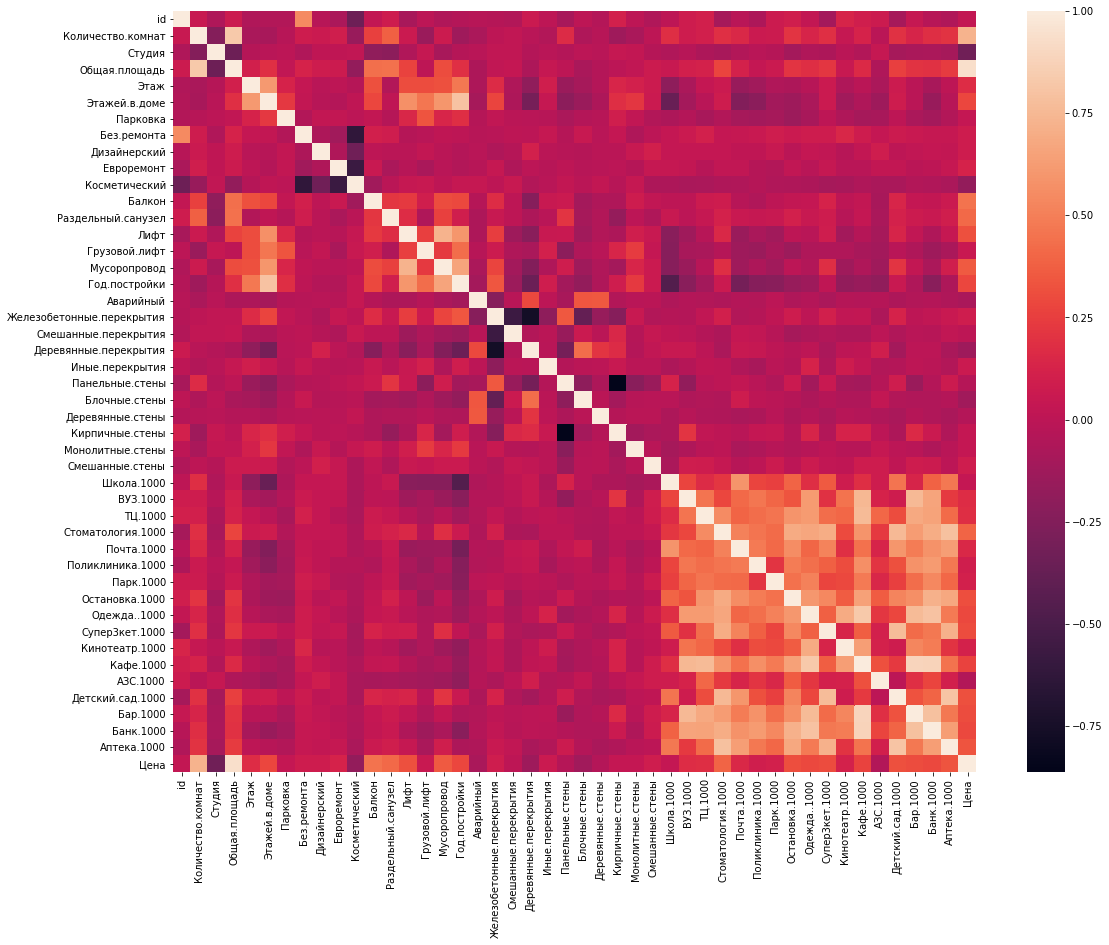

In [11]:
showHeatmap(train)

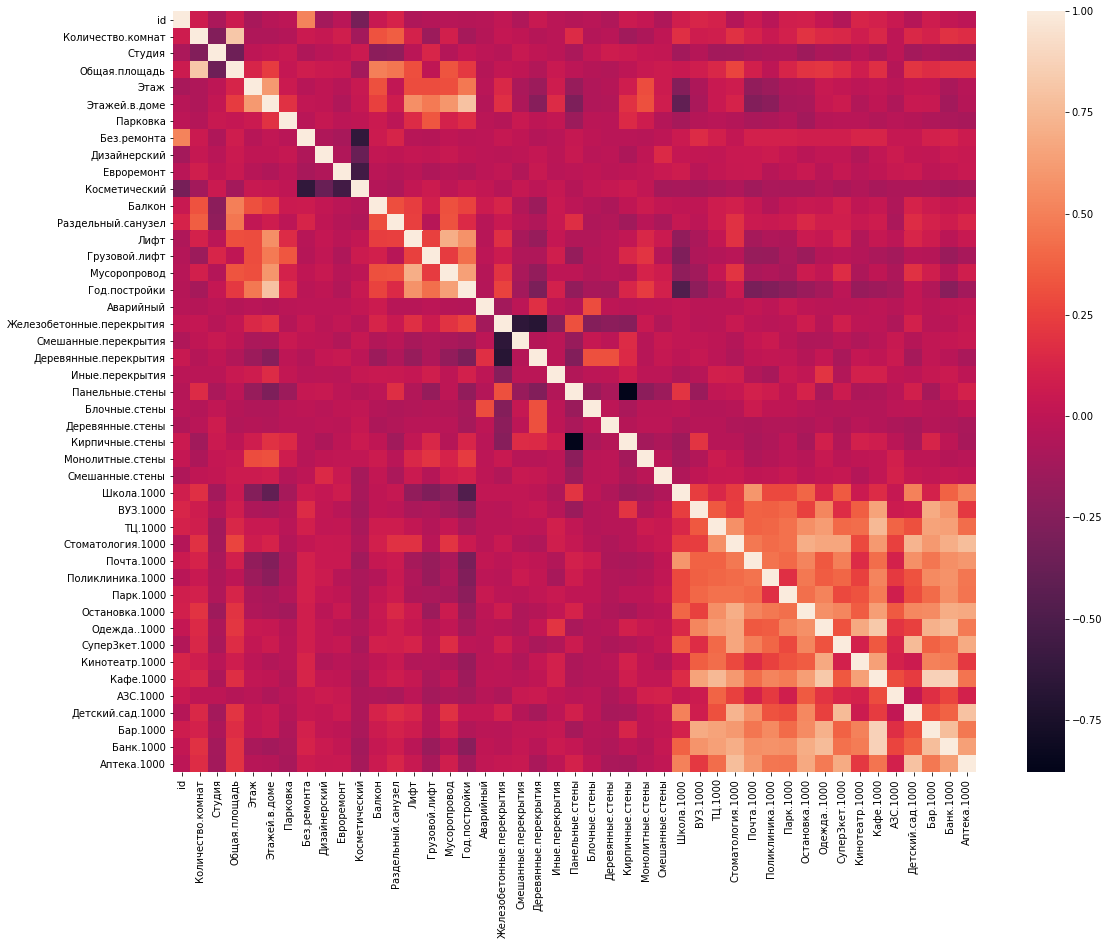

In [12]:
showHeatmap(test)

In [13]:
train.columns

Index(['id', 'Количество.комнат', 'Студия', 'Общая.площадь', 'Этаж',
       'Этажей.в.доме', 'Парковка', 'Без.ремонта', 'Дизайнерский',
       'Евроремонт', 'Косметический', 'Балкон', 'Раздельный.санузел', 'Лифт',
       'Грузовой.лифт', 'Мусоропровод', 'Год.постройки', 'Аварийный',
       'Железобетонные.перекрытия', 'Смешанные.перекрытия',
       'Деревянные.перекрытия', 'Иные.перекрытия', 'Панельные.стены',
       'Блочные.стены', 'Деревянные.стены', 'Кирпичные.стены',
       'Монолитные.стены', 'Смешанные.стены', 'Школа.1000', 'ВУЗ.1000',
       'ТЦ.1000', 'Стоматология.1000', 'Почта.1000', 'Поликлиника.1000',
       'Парк.1000', 'Остановка.1000', 'Одежда..1000', 'Супер3кет.1000',
       'Кинотеатр.1000', 'Кафе.1000', 'АЗС.1000', 'Детский.сад.1000',
       'Бар.1000', 'Банк.1000', 'Аптека.1000', 'Цена'],
      dtype='object')

In [14]:
train[target_col]

0      2030000.0
1      1400000.0
2      2950000.0
3      5250000.0
4      1080000.0
         ...    
797    2100000.0
798    3000000.0
799    2450000.0
800    1300000.0
801    2100000.0
Name: Цена, Length: 802, dtype: float64

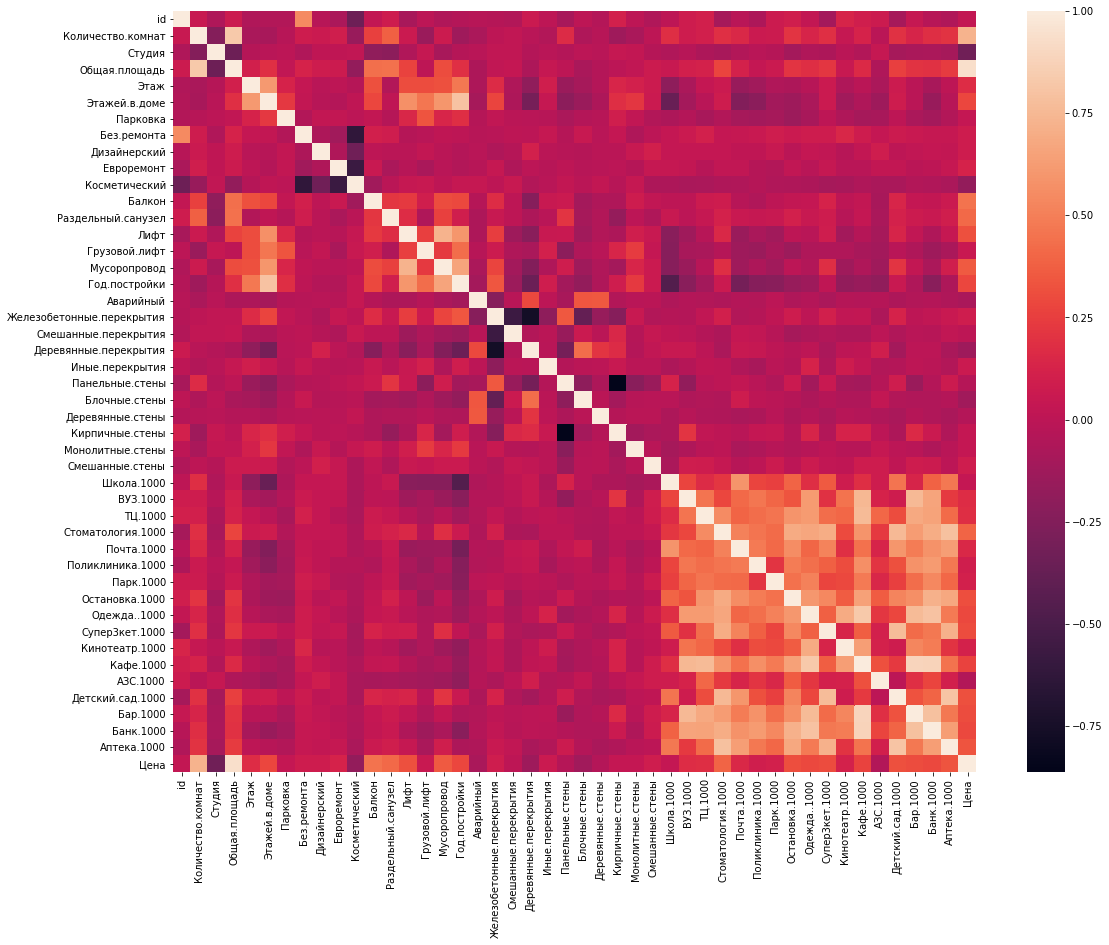

In [15]:
showHeatmap(train)

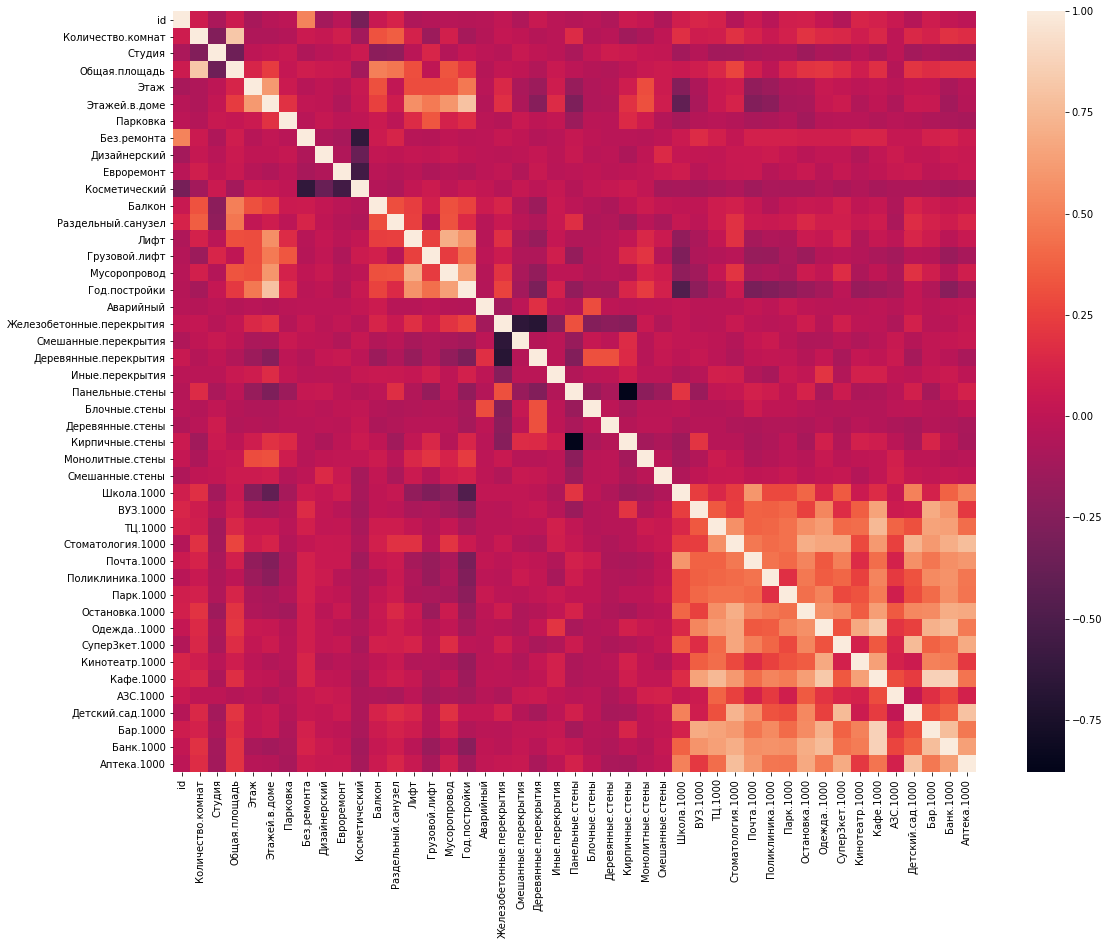

In [16]:
showHeatmap(test)

In [17]:
test

,id,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,Косметический,Балкон,Раздельный.санузел,Лифт,Грузовой.лифт,Мусоропровод,Год.постройки,Аварийный,Железобетонные.перекрытия,Смешанные.перекрытия,Деревянные.перекрытия,Иные.перекрытия,Панельные.стены,Блочные.стены,Деревянные.стены,Кирпичные.стены,Монолитные.стены,Смешанные.стены,Школа.1000,ВУЗ.1000,ТЦ.1000,Стоматология.1000,Почта.1000,Поликлиника.1000,Парк.1000,Остановка.1000,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000
0,747,1,0,39.0,4,16,0,0,0,0,1,1.0,1,1,1,1,2016,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,1,2,0,7,0,2,0,1,1,2,1,0,5
1,962,1,0,34.8,1,2,0,0,0,0,1,0.0,0,0,0,0,2004,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,2,0,2,0,0,3,3,1,1,1
2,1105,1,0,37.7,2,17,0,0,0,0,1,1.0,0,1,0,1,2015,0,1,0,0,0,0,0,0,1,0,0,2,2,3,9,1,0,1,5,2,9,0,9,3,17,4,2,13
3,795,4,0,83.5,10,10,0,0,0,0,1,1.0,1,1,0,1,1988,0,1,0,0,0,1,0,0,0,0,0,4,2,5,13,3,1,2,13,47,5,1,19,2,11,2,13,20
4,390,1,0,42.0,10,10,0,0,0,0,1,1.0,1,0,1,0,2013,0,1,0,0,0,1,0,0,0,0,0,4,3,0,12,2,2,2,20,8,8,0,7,2,18,6,6,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,1060,2,0,48.0,5,5,0,0,0,0,1,1.0,1,0,0,0,1967,0,1,0,0,0,1,0,0,0,0,0,4,0,1,8,1,1,0,9,4,3,0,5,1,11,0,9,12
779,67,4,0,84.0,10,10,0,0,0,1,0,1.0,0,1,0,1,1995,0,1,0,0,0,1,0,0,0,0,0,4,7,6,33,3,6,4,28,43,8,0,32,5,19,18,38,32
780,754,1,0,36.0,8,10,0,0,0,0,1,1.0,1,1,0,1,1988,0,1,0,0,0,1,0,0,0,0,0,5,3,2,5,1,4,0,11,2,10,0,6,3,14,1,2,15
781,1077,2,0,53.0,3,5,0,0,0,0,1,1.0,1,0,0,0,1990,0,1,0,0,0,0,0,0,1,0,0,2,1,0,1,1,2,0,4,6,4,1,2,6,4,1,1,6


In [18]:
x = train.loc[:, train.columns != target_col]
y = train[target_col]

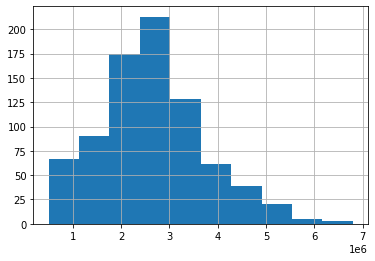

In [19]:
y.hist()
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, r2_score
import numpy as np

In [21]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.7)

In [22]:
def create_submission(id_col, y_pred):
    submission = pd.DataFrame({
        'id': id_col,
        'Цена': y_pred
    })
    return submission

In [23]:
train

,id,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,Косметический,Балкон,Раздельный.санузел,Лифт,Грузовой.лифт,Мусоропровод,Год.постройки,Аварийный,Железобетонные.перекрытия,Смешанные.перекрытия,Деревянные.перекрытия,Иные.перекрытия,Панельные.стены,Блочные.стены,Деревянные.стены,Кирпичные.стены,Монолитные.стены,Смешанные.стены,Школа.1000,ВУЗ.1000,ТЦ.1000,Стоматология.1000,Почта.1000,Поликлиника.1000,Парк.1000,Остановка.1000,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
0,1122,1,0,33.6,5,9,0,0,0,0,1,1.0,0,1,0,1,2013,0,1,0,0,0,1,0,0,0,0,0,2,2,2,8,0,1,1,4,1,8,0,6,1,12,5,2,12,2030000.0
1,1369,1,0,32.0,2,5,0,0,0,0,1,1.0,0,0,0,0,1975,0,1,0,0,0,1,0,0,0,0,0,2,0,3,3,2,1,2,11,5,2,0,6,2,5,1,5,14,1400000.0
2,901,2,0,48.3,2,14,0,0,0,1,0,0.0,0,1,0,1,1984,0,1,0,0,0,0,0,0,1,0,0,12,4,1,5,5,1,2,11,5,4,0,8,1,23,5,10,23,2950000.0
3,379,3,0,86.0,7,15,0,0,0,1,0,1.0,1,1,0,1,2013,0,1,0,0,0,1,0,0,0,0,0,1,2,2,7,0,1,1,4,1,8,0,6,0,11,5,1,12,5250000.0
4,162,1,1,18.0,1,5,0,0,0,0,1,0.0,0,0,0,0,1973,0,1,0,0,0,1,0,0,0,0,0,3,0,0,1,2,3,0,7,0,2,0,1,3,4,3,0,9,1080000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,318,2,0,45.0,1,5,0,0,0,0,1,0.0,0,0,0,0,1973,0,1,0,0,0,1,0,0,0,0,0,5,0,1,6,1,3,0,6,3,5,0,7,2,11,2,8,9,2100000.0
798,1373,2,0,49.0,2,5,0,0,0,0,1,1.0,1,0,0,0,1979,0,1,0,0,0,1,0,0,0,0,0,1,0,3,3,2,1,1,11,5,2,0,6,3,4,1,5,13,3000000.0
799,499,2,0,39.0,2,12,0,0,0,0,1,2.0,1,1,0,1,1983,0,1,0,0,0,1,0,0,0,0,0,9,0,3,6,3,4,1,13,5,11,0,5,1,22,4,8,18,2450000.0
800,1375,1,1,21.0,3,5,1,0,0,0,1,0.0,0,1,1,0,2016,0,1,0,0,0,0,0,0,0,1,0,2,0,2,3,2,2,0,9,5,1,0,2,3,5,0,4,9,1300000.0


In [24]:
def crossval_predict_train (x, y, model, params=None):
    prediction = cross_val_predict(model, x, y, fit_params=params)
    print(f"RMSE of model: {math.sqrt(mse(y, prediction))}")
    print(f"R squared of model: {rsquared(y, prediction)}")

In [25]:
y_train

442     900000.0
124    3270000.0
677     650000.0
606    2100000.0
614    3650000.0
         ...    
596    3000000.0
163    5000000.0
20     2950000.0
439    2100000.0
313    2400000.0
Name: Цена, Length: 561, dtype: float64

In [26]:
from sklearn.linear_model import LinearRegression
crossval_predict_train(x, y, LinearRegression())

RMSE of model: 305078.7890581838
R squared of model: 0.9209416636085481


In [27]:
from sklearn.linear_model import Lasso
crossval_predict_train(x, y, Lasso())

RMSE of model: 305011.3654658005
R squared of model: 0.9209766041433827


In [28]:
from sklearn.linear_model import ElasticNet
crossval_predict_train(x, y, ElasticNet())

RMSE of model: 307298.4742709008
R squared of model: 0.9197870568641802


In [29]:
from sklearn.linear_model import Lars
crossval_predict_train(x, y, Lars())

RMSE of model: 336078.3680251239
R squared of model: 0.9040588846874604


In [30]:
from sklearn.linear_model import OrthogonalMatchingPursuit
crossval_predict_train(x, y, OrthogonalMatchingPursuit())

RMSE of model: 325402.3281527711
R squared of model: 0.9100574999125547


In [31]:
from sklearn.linear_model import LinearRegression
crossval_predict_train(x, y, LinearRegression())

RMSE of model: 305078.7890581838
R squared of model: 0.9209416636085481


In [32]:
from sklearn.linear_model import Ridge
crossval_predict_train(x, y, Ridge())

RMSE of model: 304304.0727689052
R squared of model: 0.9213426748684006


In [33]:
crossval_predict_train(x, y, Ridge(solver='auto', ))

RMSE of model: 304304.0727689052
R squared of model: 0.9213426748684006
